In [115]:
import pandas as pd
import numpy as np

import statsmodels.api as sm 

import matplotlib.pyplot as plt
import time
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공산성 함수 

In [8]:
corolla = pd.read_csv('C:/Users/scien/Videos/toyota/ToyotaCorolla.csv')

In [15]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## Fuel 변수 수치화 

In [12]:
## 불필요 변수 삭제 및 Fuel 변수 수치화 덧붙이기 corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [53]:
dummy_p = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)

len(dummy_p)

1436

In [32]:
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
c_idx = np.array(corolla.Fuel_Type =='CNG')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')

p_idx

array([False, False, False, ...,  True,  True,  True])

In [33]:
dummy_p[p_idx]=1
dummy_d[d_idx]=1
dummy_c[c_idx]=1

dummy_p

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d, 'CNG' : dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


## 불필요 변수 삭제 및 Fuel 변수 수치화 덧붙이기 

In [56]:
corolla_ = corolla.drop(["Id","Model","Fuel_Type"],axis = 1, inplace = False)
mlr_data = pd.concat((corolla_,Fuel),axis=1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


## bias를 위한 상수항 추가 

In [54]:
mlr_data = sm.add_constant(mlr_data, has_constant = 'add')
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


## 학습과 평가 셋 분리 7:3

In [68]:
feature_columns = mlr_data.columns.difference(['Price']) # Target 제외

X = mlr_data[feature_columns] # Price만 제외됨
Y = mlr_data['Price']

train_x, test_x, train_y, test_y = train_test_split(X,Y, train_size = 0.7, test_size=0.3)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1005, 36) (1005,) (431, 36) (431,)


## train과 회귀모델 적합

In [75]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     307.0
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:40:40   Log-Likelihood:                -8446.6
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     971   BIC:                         1.713e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -276.0026    136.551     -2.021      0.044    -543.971      -8.034
Age_08_04         -119.0795      4.245    -28.054      0.000    -127.409    -110.750
Airbag_1            28.1399    255.413      0.110      0.912    -473.084     529.364
Airbag_2           -69.4085    140.581     -0.494      0.622    -345.286     206.469
Airco              209.7238     93.368      2.246      0.025      26.498     392.950
Automatic          259.6388    161.882      1.604      0.109     -58.040     577.318
Automatic_airco   2622.8287    204.388     12.833      0.000    2221.736    3023.921
BOVAG_Guarantee    458.0892    135.453      3.382      0.001     192.275     723.904
Backseat_Divider  -356.1190    134.563     -2.646      0.008    -620.186     -92.052
Boardcomputer     -426.8008    125.023     -3.414      0.001    -672.147    -181.454
CD_Player          271.1417    106.731      2.540      0.011      61.692     480.591
CNG              -1103.2217    257.126     -4.291      0.000   -1607.809    -598.634
Central_Lock      -101.1032    159.771     -0.633      0.527    -414.639     212.433
Cylinders           -0.0332      0.002    -14.039      0.000      -0.038      -0.029
Diesel            -210.9907    198.300     -1.064      0.288    -600.136     178.155
Doors                7.3665     42.980      0.171      0.864     -76.978      91.711
Gears             -124.8921    209.285     -0.597      0.551    -535.596     285.812
Guarantee_Period    70.3345     14.163      4.966      0.000      42.541      98.129
HP                  16.0596      3.734      4.301      0.000       8.733      23.386
KM                  -0.0163      0.001    -11.938      0.000      -0.019      -0.014
Met_Color          -28.2900     79.133     -0.357      0.721    -183.581     127.001
Metallic_Rim       250.7756    102.968      2.435      0.015      48.709     452.842
Mfg_Month          -93.8164     10.921     -8.590      0.000    -115.249     -72.384
Mfg_Year             1.1181      0.901      1.242      0.215      -0.649       2.885
Mfr_Guarantee      296.4593     77.161      3.842      0.000     145.037     447.881
Mistlamps           96.5055    116.055      0.832      0.406    -131.242     324.253
Petrol            1314.2041    210.494      6.243      0.000     901.129    1727.279
Power_Steering     -84.9280    286.740     -0.296      0.767    -647.630     477.774
Powered_Windows    324.0665    160.860      2.015      0.044       8.392     639.740
Quarterly_Tax       16.2016      2.033      7.971      0.000      12.213      20.190
Radio              -88.5096   1119.616     -0.079      0.937   -2285.654    2108.635
Radio_cassette     109.4383   1118.728      0.098      0.922   -2085.965    2304.842
Sport_Model        308.6089     92.877      3.323      0.001     126.346     490.871
Tow_Bar           -136.

This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

=> 다중공산성의 문제가 파악되기 때문에 VIF를 통해 다중공산성을 확인할 필요가 있다.

In [83]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif['features'] = mlr_data.columns
vif

,VIF Factor,features
0,10.953474,Price
1,inf,Age_08_04
2,inf,Mfg_Month
3,inf,Mfg_Year
4,2.400334,KM
5,2.621514,HP
6,1.143778,Met_Color
7,1.121303,Automatic
8,1.258641,cc
9,1.352288,Doors


##  OLS와 VIF 검정을 통해 도출된 값 중 VIF값과 P-value 값이 높은 변수는 제거해야한다. 

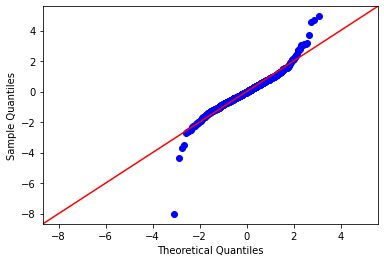

In [90]:
# 학습 데이터의 잔차 확인
res = fitted_full_model.resid

# qq plot을 이용한 잔차의 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

## qqplot이란?

- 잔차의 정규성을 확인할 때 쓰는 그래프로 y=x형태를 띄어야 정규성을 보인다. 
- 완전한 정규성을 띄진 않는다,하지만 실제 데이터는 조금 다른데
- 그래프의 꼬리부분을 제외하면 정규성을 띄고 있으며 양호하다고 판단을 내릴 수 있다.

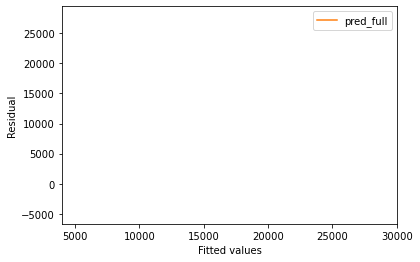

In [104]:
# 잔차 패턴 확인 

pred_y = fitted_full_model.predict(train_x)
plt.xlim(4000, 30000)
plt.plot(np.array(pred_y))
plt.xlabel('Fitted values')
plt.ylabel('Residual')

pred_y2 = fitted_full_model.predict(test_x)
plt.plot(np.array(test_y - pred_y2), label='pred_full')
plt.legend()
plt.show()

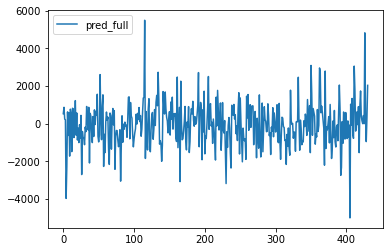

In [102]:
pred_y2 = fitted_full_model.predict(test_x)

plt.plot(np.array(test_y - pred_y2), label='pred_full')
plt.legend()

In [108]:
mean_squared_error(y_true=test_y, y_pred=pred_y2)

1338039.5941151832

## 변수선택법 
- 전진선택법 

In [ ]:
def getBest(x,y,k):
    
    results = []
    for combo in itertools.combinations(rawDataStep.columns, k):
        ret = checkSubset(x=rawDataStep, y=rawData.Price, feature_set=combo)
        results.append(ret)
        print(type(results))
        
    models = pd.DataFrame(results)
    bestModel = models.loc[models['AIC'].argmin()]
    return bestModel

In [136]:
def forward(x,y,predicctors): #선택되어 있는 변수 
    remaining_predictors = [p for p in x.columns.diffrence(['const']) if p not in predictos]
    results = []
    for p in remaning_predictors:
        results.append(processSubset(x=x, y=y, feature_set = predictors + [p] +['const']))